# EDA for Wine Reviews

Every day, dozens of wines are reviewed by professional reviewers. They write up short descriptions of the wines they taste as assign a score out of 100 to indicate quality. Certain reviewers build up a reputation in the wine industry and gather a dedicated following of fans. These fans rely on their favourite reviewer to know which wines to try.

This case study shows Exploratory Data Analysis part for the given dataset. 


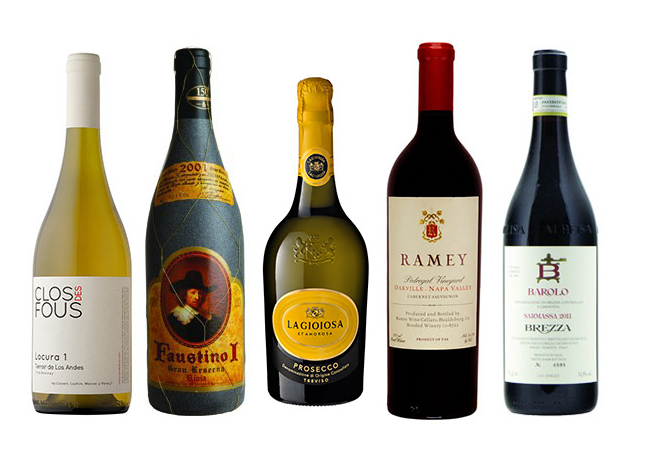

In [1]:
# Importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Imputing data and creating dataframe object
df = pd.read_csv('D:\ML projects\Wine reviews\winemag-data-130k-v2.csv')

In [3]:
# Reading data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [4]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
# Checking statistics of numerical data
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [6]:
# Dropping unwanted column
df.drop(columns='Unnamed: 0', inplace=True)

In [7]:
# Creating a DataFrame for Columns and their null values percentage
df_null = pd.DataFrame(round((df.isna().sum()/df.shape[0])*100,2),columns=['% Null']).reset_index()
df_null.rename(columns={'index':'Column'},inplace=True)
print(df_null.sort_values(by='% Null',ascending=False).head(10))


                  Column  % Null
7               region_2   61.14
2            designation   28.83
9  taster_twitter_handle   24.02
8            taster_name   20.19
6               region_1   16.35
4                  price    6.92
0                country    0.05
5               province    0.05
1            description    0.00
3                 points    0.00


In [8]:
df_high_null = df_null[df_null['% Null']>24].sort_values(by='% Null')
# Columns in the above set will be dropped
cols_to_drop = df_high_null.Column.values
print(cols_to_drop )
df.drop(labels=cols_to_drop,axis=1,inplace=True)

------------------------------
['taster_twitter_handle' 'designation' 'region_2']


In [9]:
# Checking % null values
df_null = pd.DataFrame(round((df.isna().sum()/df.shape[0])*100,2),columns=['% Null']).reset_index()
df_null[df_null['% Null']>0]

,index,% Null
0,country,0.05
3,price,6.92
4,province,0.05
5,region_1,16.35
6,taster_name,20.19


In [10]:
# Remoing null vales
df = df[df['taster_name'].notna()]

In [11]:
# Checing %  null values
df_null = pd.DataFrame(round((df.isna().sum()/df.shape[0])*100,2),columns=['% Null']).reset_index()
df_null[df_null['% Null']>0]

,index,% Null
0,country,0.06
3,price,6.99
4,province,0.06
5,region_1,20.13


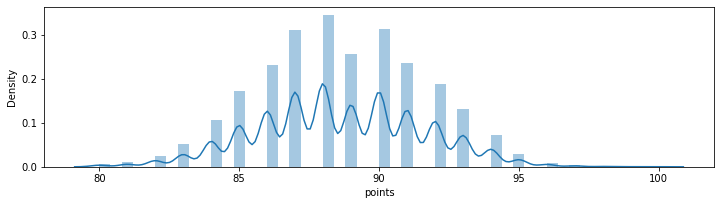

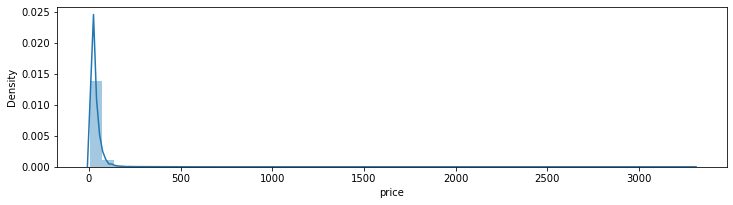

In [12]:
# Plotting distplot for hecking distribution of numerical variables
num_cols = ['points','price']
i=1
for col in num_cols:
  plt.figure(figsize=(12,10))
  plt.subplot(3,1,i)
  sns.distplot(df[col])
  i+=1
  plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103727 entries, 0 to 129970
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      103664 non-null  object 
 1   description  103727 non-null  object 
 2   points       103727 non-null  int64  
 3   price        96479 non-null   float64
 4   province     103664 non-null  object 
 5   region_1     82847 non-null   object 
 6   taster_name  103727 non-null  object 
 7   title        103727 non-null  object 
 8   variety      103727 non-null  object 
 9   winery       103727 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 8.7+ MB


In [14]:
df['region_1'].value_counts()

Columbia Valley (WA)           4123
Mendoza                        2298
Willamette Valley              2276
Alsace                         2077
Napa Valley                    1855
                               ... 
Catalonia                         1
Malibu-Newton Canyon              1
Aglianico del Beneventano         1
Napa-Carneros                     1
Vino de la Tierra de Zamora       1
Name: region_1, Length: 1108, dtype: int64

In [15]:
df.head()

,country,description,points,price,province,region_1,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [16]:
df.drop(columns=['region_1'], inplace = True)

In [17]:
df.head()

,country,description,points,price,province,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [18]:
df['price'] = df['price'].fillna(df.price.mean())
df['country'] = df['country'].fillna(df.country.mode()[0])
df['province'] = df['province'].fillna(df.province.mode()[0])

In [19]:
df.head()

,country,description,points,price,province,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,34.998642,Sicily & Sardinia,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.000000,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.000000,Oregon,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.000000,Michigan,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.000000,Oregon,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [20]:
df_null = pd.DataFrame(round((df.isna().sum()/df.shape[0])*100,2),columns=['% Null']).reset_index()
df_null[df_null['% Null']>0]

,index,% Null


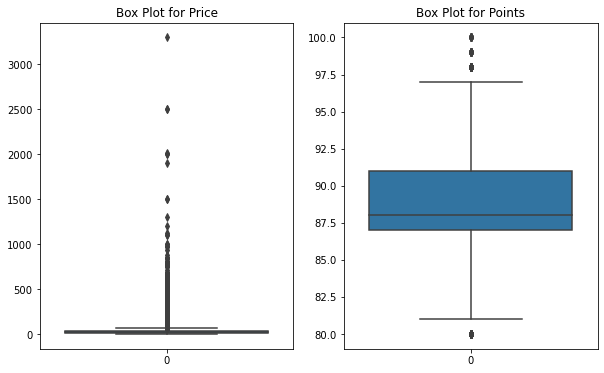

In [21]:
# Plotting Box plot
plt.figure(figsize=[10,6])
plt.subplot(1,2,1)
sns.boxplot(data=df['price']).set(title ='Box Plot for Price')
plt.subplot(1,2,2)
sns.boxplot(data=df['points']).set(title ='Box Plot for Points')
plt.show()

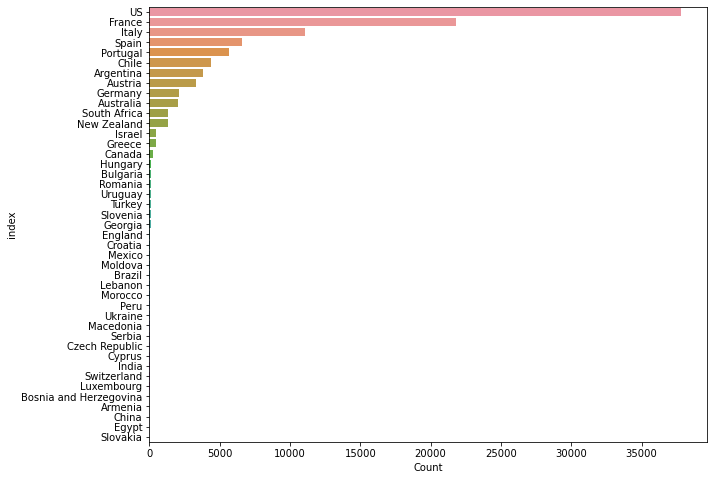

In [22]:
# Plotting bar plot
df_1 = df['country'].value_counts().to_frame(name = 'Count')
df_1.reset_index(inplace=True)
plt.figure(figsize=[10,8])
sns.barplot(data=df_1, x='Count', y='index')
plt.show()


In [23]:
# Checking count
df['variety'].value_counts().to_frame(name = 'Count')


,Count
Pinot Noir,10319
Chardonnay,8943
Red Blend,7109
Bordeaux-style Red Blend,6390
Cabernet Sauvignon,6271
...,...
Trajadura,1
Vital,1
Merlot-Grenache,1
Mavrotragano,1


In [24]:
# Checking count
df['winery'].value_counts().to_frame(name = 'Count')


,Count
Wines & Winemakers,222
DFJ Vinhos,215
Georges Duboeuf,196
Chateau Ste. Michelle,194
Louis Latour,185
...,...
Finca Villacreces,1
Château Gautoul,1
Gazur,1
Clos Larcis,1
